In [11]:
# Tutorial https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/#
import pandas as pd

# 1st: Read the line
df = pd.read_csv("Train_UWu5bXk.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
# 2nd: Impute missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
# missing values in Item_Weight and Outlet_size needs to be imputed 
mean = df["Item_Weight"].mean() # imputing item_weight with mean
df["Item_Weight"].fillna(mean, inplace=True)

mode = df["Outlet_Size"].mode() # imputing outlet size with mode 
df["Outlet_Size"].fillna(mode[0], inplace=True)

In [16]:
# deal with categorical variables and drop the id columns 
df.drop(["Item_Identifier", "Outlet_Identifier"], axis=1, inplace=True)
df = pd.get_dummies(df)

In [18]:
# create train and test set 
from sklearn.model_selection import train_test_split 
train, test = train_test_split(df, test_size=0.3)

x_train = train.drop("Item_Outlet_Sales", axis=1)
y_train = train["Item_Outlet_Sales"]

x_test = test.drop("Item_Outlet_Sales", axis=1)
y_test = test["Item_Outlet_Sales"]

In [19]:
# preprocessing - scaling the features 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [20]:
# error rate for different k values 

from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt 
%matplotlib inline 

rmse_val = [] # to store the rmse values for different k 
for K in range(20):
    K = K + 1
    model = neighbors.KNeighborsRegressor(n_neighbors=K)
    model.fit(x_train, y_train) # fit the model
    pred = model.predict(x_test) # make prediction on test set 
    error = sqrt(mean_squared_error(y_test, pred)) # calculate rmse
    rmse_val.append(error) # store rmse values
    print("RMSE value for for k", K, "is:", error)

RMSE value for for k 1 is: 1645.6503778630677
RMSE value for for k 2 is: 1425.5878174727175
RMSE value for for k 3 is: 1360.80230073399
RMSE value for for k 4 is: 1335.304471546441
RMSE value for for k 5 is: 1311.2404530271647
RMSE value for for k 6 is: 1299.52864793446
RMSE value for for k 7 is: 1289.8449616582723
RMSE value for for k 8 is: 1290.9796350407387
RMSE value for for k 9 is: 1293.3236498056058
RMSE value for for k 10 is: 1292.8005328816414
RMSE value for for k 11 is: 1294.7217430570463
RMSE value for for k 12 is: 1298.2219368645153
RMSE value for for k 13 is: 1301.1864045859045
RMSE value for for k 14 is: 1302.2084418919874
RMSE value for for k 15 is: 1307.7042027332702
RMSE value for for k 16 is: 1311.9119750682084
RMSE value for for k 17 is: 1314.8279880986322
RMSE value for for k 18 is: 1322.7501982535769
RMSE value for for k 19 is: 1327.7509198826897
RMSE value for for k 20 is: 1333.103654362908


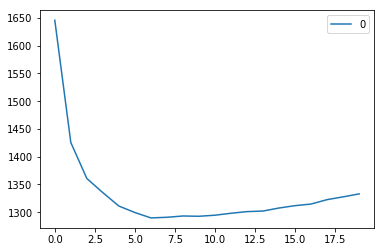

In [21]:
# plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) # elbow curve
curve.plot()

In [23]:
# Prediction on the test dataset 
# reading test and submission files

test = pd.read_csv("Test_u94Q5KV.csv")
submission = pd.read_csv("SampleSubmission_TmnO39y.csv")
submission["Item_Identifier"] = test["Item_Identifier"]
submission["Outlet_Identifier"] = test["Outlet_Identifier"]

# preprocessing test dataset
test.drop(["Item_Identifier", "Outlet_Identifier"], axis=1, inplace=True)
test["Item_Weight"].fillna(mean, inplace=True)
test = pd.get_dummies(test)
test_scaled = scaler.fit_transform(test)
test = pd.DataFrame(test_scaled)

# predicting on the test set and creating submission file 
predict = model.predict(test)
submission["Item_Outlet_Sales"] = predict
submission.to_csv("submit_file.csv", index=False)



In [24]:
# Implementing GridsearchCV
# Use Gridsearch to find the best value of k

from sklearn.model_selection import GridSearchCV
params = {"n_neighbors": [2, 3, 4, 5, 6, 7, 8, 9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train, y_train)
model.best_params_

{'n_neighbors': 8}

In [ ]:
# Learn how to build KNN from scratch here: https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/
